# Data: Fairfax County Fire and Rescue Department call data and patient demographics 
Team: Fairfax Consultants

In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")
#pip install nbconvert #or conda install nbconvert  #to save the notebook as .pdf
#nbconvert[webpdf]
#pip install pyppeteer
#https://github.com/jgm/pandoc/releases/tag/2.18

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#to get values as dict you can use the following script #https://stackoverflow.com/questions/64323745/how-to-find-the-version-of-jupyter-notebook-from-within-the-notebook
import subprocess
versions = subprocess.check_output(["jupyter", "--version"]).decode().split('\n')
parsed_versions = {}
for component in versions:
    if component == "":
        continue
    comps = list(map(str.strip, component.split(': ')))
    parsed_versions[comps[0]] = comps[1]
parsed_versions

# #Check the version
# !jupyter --version
# !python --version

{'jupyter core': '4.7.1',
 'jupyter-notebook': '6.4.3',
 'qtconsole': '5.1.0',
 'ipython': '7.26.0',
 'ipykernel': '6.2.0',
 'jupyter client': '7.0.1',
 'jupyter lab': '3.1.7',
 'nbconvert': '6.4.4',
 'ipywidgets': '7.6.3',
 'nbformat': '5.1.3',
 'traitlets': '5.0.5'}

In [3]:
#Import libraries
import os

import pandas as pd
import numpy as np
import math
#Import Viz libraries


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Altair can be installed, along with the example datasets in vega_datasets, using:$ pip install altair vega_datasets
#https://altair-viz.github.io/gallery/index.html

import altair as alt #pip install altair (from anaconda Powershell)
from vega_datasets import data # pip install vega_datasets/ #Only to use data from vegas data sets or else can be ignored

#To avoid MaxRowsError: in big data sets with altair
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
#alt.renderers.enable('notebook') #$ pip install vega #https://altair-viz.github.io/user_guide/display_frontends.html

#pip install altair_viewer
#alt.renderers.enable('altair_viewer') 
#pip install altair_saver #to save interactive charts with interactive elements

#alt.renderers.enable('svg') #renders the chart as a static svg image within a Jupyter notebook.
#chart.save('chart.html', embed_options={'renderer':'svg'}) #o change to svg rendering, use the embed_options as such

DataTransformerRegistry.enable('json')

In [4]:
#Import all sheet by index
# # Set current working directory
# os.chdir("C:\\Users\\matth\\OneDrive\\Documents\\GMU\\DAEN 690\\Sponsor Files")
#df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])

df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3])

# # reading csv file and at a same time using converters attribute which will remove extra space
# df = pd.read_csv('\\student_data.csv', converters={'Name': str.strip(),
#                                                 'Blood Group' : str.strip(),
#                                                 'Gender' : str.strip() } )

#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [5]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [6]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis  \
0                          NaN   

                                   HospitalDiagnosi

In [7]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeV

In [8]:
#Count Nulls
print(PatDemo.isnull().sum())

Patient_ID_Internal         0
PatientRace              5782
PatientEthnicity         5782
Patient_Race_List_Raw    5782
PatientSex               5780
PatientGender            5780
Patient_Gender_Raw       5780
IsJuvenileUnder18           0
IsSenior65+                 0
AgeGroup_HIPAA           5786
dtype: int64


<AxesSubplot:>

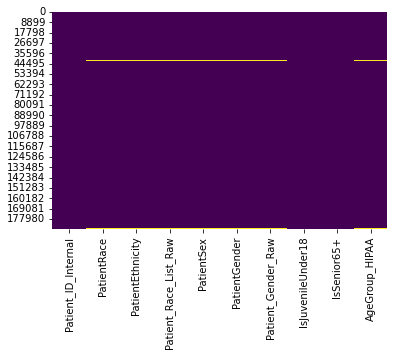

In [9]:
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PatDemo.isnull(),cbar=False,cmap='viridis')

In [10]:
#Check if any columns or values are duplicated.

print("\n If any column header redundant?:",PatDemo.columns.duplicated())
print("\n Sex & Gender Duplicated?   : ",PatDemo['PatientSex'].equals(PatDemo['PatientGender']))
print("\n Race Duplicated?           : ",PatDemo['Patient_Race_List_Raw'].equals(PatDemo['PatientRace']))
print("\n Gender and GRaw Duplicated?: ",PatDemo['Patient_Gender_Raw'].equals(PatDemo['PatientGender']))

#PatDemo.columns
#even if logicaltest says not duplicated, it is okay to delete 'PatientSex',  'Patient_Gender_Raw', 'Patient_Race_List_Raw'


 If any column header redundant?: [False False False False False False False False False False]

 Sex & Gender Duplicated?   :  False

 Race Duplicated?           :  False

 Gender and GRaw Duplicated?:  False


In [11]:
#drop reduntant columns
PatDemo.drop(["Patient_Race_List_Raw", "Patient_Gender_Raw",'PatientGender'], axis =1,  inplace =True)
PatDemo.head(2)

,Patient_ID_Internal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [12]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)

In [13]:
# create dummy variables
#pd.get_dummies(PatDemo['PatientSex']) #may be sex column can be binarized

In [14]:
#Count of unique values in each rows for each column
  
print("No.of.unique values in each column :\n", PatDemo.nunique(axis=0))

No.of.unique values in each column :
 PtIDInternal         186865
PatientRace               7
PatientEthnicity          2
PatientSex                3
IsJuvenileUnder18         2
IsSenior65+               2
AgeGroup_HIPAA           11
dtype: int64


In [15]:
#read unique values, how many patients under particular age group

#print("\n unique values: ", PatDemo['AgeGroup_HIPAA'].unique() )
#print("\n Count of unique values: ", len(PatDemo['AgeGroup_HIPAA'].unique()))
#print("\n Count of unique values: ", PatDemo.AgeGroup_HIPAA.nunique())
#print("\n Count of each unique values: ", list(PatDemo.AgeGroup_HIPAA.value_counts()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
2022-10-19 00:00:00     8909
20-29                  16537
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
Name: PtIDInternal, dtype: int64


In [16]:
#Convert AgeGroup_HIPAA to string to get rid of datetime format value
PatDemo['AgeGroup_HIPAA']= PatDemo['AgeGroup_HIPAA'].astype('str')
#print("\n sorted age group:",sorted(PatDemo['AgeGroup_HIPAA'].unique()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
20-29                  16537
2022-10-19 00:00:00     8909
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
nan                     5786
Name: PtIDInternal, dtype: int64


In [17]:
#check the data types for rest of the columns
print(PatDemo.info())
print("\n details: \n",PatDemo['AgeGroup_HIPAA'].describe())
# PatDemo.dtypes
# PatDemo.index
# PatDemo.shape
# PatDemo.memory_usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186865 entries, 0 to 186864
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PtIDInternal       186865 non-null  int64 
 1   PatientRace        181083 non-null  object
 2   PatientEthnicity   181083 non-null  object
 3   PatientSex         181085 non-null  object
 4   IsJuvenileUnder18  186865 non-null  int64 
 5   IsSenior65+        186865 non-null  int64 
 6   AgeGroup_HIPAA     186865 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.0+ MB
None

 details: 
 count     186865
unique        12
top        70-79
freq       26567
Name: AgeGroup_HIPAA, dtype: object


In [18]:
#Replace '2022-10-19 00:00:00' with 10-19 and nan with Unk, my logic is even NULL is also unknown in a way

PatDemo["AgeGroup_HIPAA"] = PatDemo["AgeGroup_HIPAA"].replace({'2022-10-19 00:00:00':'10_19','20-29':'20_29','50-59':'50_59', 
                                                               '80-89':'80_89','70-79':'70_79','40-49':'40_49','Under 10':'<10', 
                                                               '60-69':'60_69','30-39':'30_39', 'nan':'Unk'})

#sorted(PatDemo["AgeGroup_HIPAA"].unique())
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())
# Total=sum(PatDemo['AgeGroup_HIPAA'].value_counts(dropna=True))
# Total
# PatDemo.AgeGroup_HIPAA.value_counts(dropna=True)


 Count of each unique values:  AgeGroup_HIPAA
10_19     8909
20_29    16537
30_39    19237
40_49    17861
50_59    22475
60_69    24507
70_79    26567
80_89    26102
90+      12476
<10       6403
Unk       5791
Name: PtIDInternal, dtype: int64


# Lets try some vizualizations for demography distributions:

[Text(0, 0, 'Under 10'),
 Text(1, 0, '10-19'),
 Text(2, 0, '20-29'),
 Text(3, 0, '30-39'),
 Text(4, 0, '40-49'),
 Text(5, 0, '50-59'),
 Text(6, 0, '60-69'),
 Text(7, 0, '70-79'),
 Text(8, 0, '80-89'),
 Text(9, 0, '90+'),
 Text(10, 0, 'Unk')]

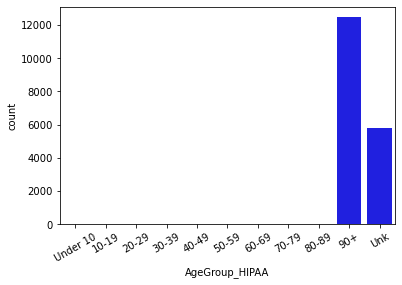

In [19]:
## count plot for age demographics
age_plot = sns.countplot(data = PatDemo, x = 'AgeGroup_HIPAA', 
              order = ['Under 10', '10-19', '20-29', '30-39', '40-49', '50-59',
                       '60-69', '70-79', '80-89', '90+','Unk'],
              color = 'b')
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation = 30)

In [20]:
#Age group distribution among different demographies

import altair as alt


source = PatDemo

PtDemchart1 = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientEthnicity:N'
)


# PtDemchart2 = alt.Chart(PatDemo).mark_bar().encode(
#      y='AgeGroup_HIPAA',
#      x='count(AgeGroup_HIPAA)',
#     color='PatientRace:N'
#  )

PtDemchart3 = alt.Chart(PatDemo).mark_bar().encode(
     x='AgeGroup_HIPAA:O',
     y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N'
 )


PtDemchart1 | PtDemchart3#PtDemchart2|



alt.HConcatChart(...)

In [21]:
#interactive brush selection charts
import altair as alt
from vega_datasets import data
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')

source = PatDemo
brush = alt.selection(type='interval')

alt.Chart(source).mark_point().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color=alt.condition(brush, 'PatientRace:O', alt.value('grey')),
).add_selection(brush)

alt.Chart(...)

In [22]:
#interactive Charts

import altair as alt
from vega_datasets import data

source = PatDemo
selection = alt.selection_multi(fields=['PatientSex'], bind='legend')
PatDemChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    column='PatientRace:N',
    tooltip=['PatientEthnicity', 'PatientSex', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
)
PatDemChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

In [23]:
#Interactive Agegroup distribution among Patient Race and Gender #https://altair-viz.github.io/gallery/streamgraph.html
import altair as alt
from vega_datasets import data

#source = pd.read_csv("E:\DAEN_690\Data\us-employment.csv")

source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientRace:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex:N','PatientRace:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
  
).add_selection(
    selection
).add_selection(brush).interactive()

#PatDemInteractive.display()
#PatDemInteractive.save('chart.html', embed_options={'renderer':'svg'})
PatDemInteractive.display()
#chart.save('chart.png', scale_factor=2.0) #Size Resolutions

#PatDemInteractive.save('chart.html')

alt.Chart(...)

In [24]:
#Second viz
source = PatDemo
selection = alt.selection_multi(fields=['PatientRace'], bind='legend')

PatDemInteractive1= alt.Chart(source).mark_area().encode(
    alt.X('AgeGroup_HIPAA:O', axis=alt.Axis(domain=False, tickSize=0)),
    alt.Y('count(AgeGroup_HIPAA):Q', stack='center', axis=None),
    alt.Color('PatientEthnicity:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=['PatientSex','PatientEthnicity', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
  
).add_selection(
    selection
).add_selection(brush).interactive()

PatDemInteractive1.display()

alt.Chart(...)

In [25]:
#Age group among gender distribution

import altair as alt
from vega_datasets import data #Only to use data from vegas data sets or else can be ignored

source = PatDemo

Agegroup = alt.Chart(source).mark_circle(size=60).encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PatientSex:N',
    tooltip=['PatientRace:N', 'PatientSex:N', 'AgeGroup_HIPAA:O', 'count(AgeGroup_HIPAA):Q']
).interactive()
Agegroup.save('Agegroup.html')
Agegroup

alt.Chart(...)

In [26]:
#Binarize the boolen values 
#PatDemo.columns
#Get the boolean values for Patients Sex
PatDemo = pd.get_dummies(PatDemo, columns=['PatientRace', 'PatientEthnicity', 'PatientSex','AgeGroup_HIPAA']) #, drop_first=True) #Since thers only two values male or female.
PatDemo

,PtIDInternal,IsJuvenileUnder18,IsSenior65+,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,...,AgeGroup_HIPAA_20_29,AgeGroup_HIPAA_30_39,AgeGroup_HIPAA_40_49,AgeGroup_HIPAA_50_59,AgeGroup_HIPAA_60_69,AgeGroup_HIPAA_70_79,AgeGroup_HIPAA_80_89,AgeGroup_HIPAA_90+,AgeGroup_HIPAA_<10,AgeGroup_HIPAA_Unk
0,1014525,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1625597,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,818385,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1726959,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1319018,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186860,1627319,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
186861,1016261,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
186862,1226587,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
186863,1326193,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#Lets drop redundant columns:
PatDemo.drop(['IsJuvenileUnder18','IsSenior65+'],axis =1,  inplace =True)
PatDemo

,PtIDInternal,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,PatientEthnicity_Hispanic/Latino,PatientEthnicity_Non-Hispanic/Latino,...,AgeGroup_HIPAA_20_29,AgeGroup_HIPAA_30_39,AgeGroup_HIPAA_40_49,AgeGroup_HIPAA_50_59,AgeGroup_HIPAA_60_69,AgeGroup_HIPAA_70_79,AgeGroup_HIPAA_80_89,AgeGroup_HIPAA_90+,AgeGroup_HIPAA_<10,AgeGroup_HIPAA_Unk
0,1014525,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1625597,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,818385,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1726959,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1319018,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186860,1627319,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
186861,1016261,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
186862,1226587,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
186863,1326193,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


# Lets Merge SEPSIS with Patient Demographics

In [28]:
#View Header and count null

print("\n header:\n",SEPSIS.head(2))

print("\n count null before merge:\n", SEPSIS.isnull().sum())



 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  
0  Acute respiratory failure with hypoxia (J96.01...  
1  Presence of urogenital implan

In [29]:
#Check if any columns or values are duplicated.
#SEPSIS['EmergencyDepartmentDiagnosis'].unique()

print("\n If any column header redundant?:",SEPSIS.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",SEPSIS['EmergencyDepartmentDiagnosis'].equals(SEPSIS['HospitalDiagnosis']))


print("\n Primary and Secondary Impression Duplicated?: ",SEPSIS['PrimaryImpression'].equals(SEPSIS['SecondaryImpression']))


# print("\n Race Duplicated?           : ",SEPSIS['Patient_Race_List_Raw'].equals(SEPSIS['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",SEPSIS['Patient_Gender_Raw'].equals(SEPSIS['PatientGender']))



 If any column header redundant?: [False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [30]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
SEPSISclean = SEPSIS

#SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].astype(str).fillna('') + SEPSISclean["HospitalDiagnosis"].astype(str).fillna('')
SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].fillna('') + SEPSISclean["HospitalDiagnosis"].fillna('')

SEPSISclean["Merged_Impression"] = SEPSISclean["PrimaryImpression"].fillna('') + SEPSISclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#SEPSIS.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",SEPSISclean.head(2))

print("\n count null after merge:\n", SEPSISclean.isna().sum())

#SEPSISclean.head(10)


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  \
0  Acute respiratory failure with hypoxia (J96.01...   
1  Presence of urogenital impl

In [31]:
#SEPSISclean.dtypes
print("\n count NaN after merge:\n",SEPSISclean[SEPSISclean == ''].count())
#SEPSISclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                         0
PtIDInternal                      0
PrimaryImpression                 0
SecondaryImpression               0
isOutcomeFacility                 0
SepsisStatus                      0
qSOFA                             0
EmergencyDepartmentDiagnosis      0
HospitalDiagnosis                 0
overall_diagnosis               776
Merged_Impression                 0
dtype: int64


In [32]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1, 
                                #pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("sepsis", na=False), "1",
                                pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0))#)
# sepsis_demo["sepsis_outcome"] = np.where(sepsis_demo["overall_diagnosis"].str.contains("A41.9", na=False, case=False), "1",
#                                 np.where(sepsis_demo["overall_diagnosis"].str.contains("A41.89", na=False, case=False), "1", "0"))


SEPSISclean.head()
#binarize primary Impr
SEPSISclean["ProviderImpression"] = pd.np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=False), 1, 
                               
                             pd.np.where(SEPSISclean["Merged_Impression"].str.contains("A41.9", na=False, case=False), 1, 0))
SEPSISclean.head()
#Accuracy
SEPSISclean["Accuracy"] = pd.np.where(SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"], 1, 0) #Match -1, MisMatch 0
SEPSISclean.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11468/1776592729.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  SEPSISclean["sepsis_outcome"] = pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1,
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11468/1776592729.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0))#)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11468/1776592729.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  SEPSISclean["ProviderImpression"] = pd.np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=F

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,None,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,None,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,None,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,Notification,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1


In [33]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

SEPSISclean["Triage0"] = np.where(((SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"])),'Triage','')
SEPSISclean["Triage1"] = np.where(((SEPSISclean["ProviderImpression"] == 1) &  (SEPSISclean["sepsis_outcome"] == 0)),'OverTriage','')
SEPSISclean["Triage2"] = np.where(((SEPSISclean["ProviderImpression"] == 0) &  (SEPSISclean["sepsis_outcome"] == 1)),'UnderTriage','')
SEPSISclean["Triage"] = SEPSISclean["Triage0"].fillna('') + SEPSISclean["Triage1"].fillna('') + SEPSISclean["Triage2"].fillna('')

print('Head: ',SEPSISclean.head())
print('UniqueValue: ',SEPSISclean["Triage"].unique())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                                              

In [34]:
#Check for unique values in each columns

print("\n Merged_Impressions Values: \n", SEPSISclean['Merged_Impression'].unique())
print("\n ProviderImpression Values: \n", SEPSISclean['ProviderImpression'].unique())
print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())
print("\n Unique Sepsis Statusvalues: \n",SEPSISclean['SepsisStatus'].unique())


 Merged_Impressions Values: 
 ['Respiratory - Pulmonary Edema Acute Onset (J81.0)Respiratory - Not Otherwise Listed (J98.9), "Infectious - Sepsis (A41.9)"'
 'Fever (R50.9)GI/GU - Nausea (Without Vomiting) (R11.0)'
 'CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Weakness (R53.1)'
 'Fever (R50.9)Not Applicable'
 'GI/GU - Abdominal Pain/Problem (R10.84)Not Applicable'
 'Infectious - Sepsis (A41.9)Weakness (R53.1), "GI/GU - Nausea (With Vomiting) (R11.2)", "Fever (R50.9)"'
 'Weakness (R53.1)Not Applicable'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)Not Applicable'
 'Infectious - Influenza (Flu Like Symptoms) (J11)Not Applicable'
 'Infectious - Sepsis (A41.9)Respiratory - Not Otherwise Listed (J98.9)'
 'Infectious - Pneumonia (J18.9)Infectious - Influenza (Flu Like Symptoms) (J11)'
 'CV - Hypotension (I95.9)Not Applicable'
 'Infectious - Sepsis (A41.9)Not Applicable'
 'Neuro - Stroke/CVA (I63.9)Not Applicable'
 'Respiratory - Not Otherwise Listed (J98.9)Dehydration (E86.0)'
 'F

In [35]:
#Crete dummies for SepsisStatus
SEPSISclean = pd.get_dummies(SEPSISclean, columns=['SepsisStatus'])#, drop_first=True)
SEPSISclean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0,,OverTriage,,OverTriage,0,0,1
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0,,,UnderTriage,UnderTriage,0,1,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1,Triage,,,Triage,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,0,0,1,Triage,,,Triage,0,0,1
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,1,1,1,Triage,,,Triage,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,0,1,0,,OverTriage,,OverTriage,0,0,1
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,1,0,0,,,UnderTriage,UnderTriage,1,0,0


In [36]:
#To iter through the values/ categories list nan are replaced with Unknown

SEPSISclean["qSOFA"] = SEPSISclean["qSOFA"].fillna('Unknown')
SEPSISclean['qSOFA'].unique()



#Create dummies for qSOFA

# SEPSISclean = pd.get_dummies(SEPSISclean, columns=['qSOFA'])#, drop_first=True) #will create 7 combinations, in fact we have only three criteria.
# SEPSISclean
#following method will identify three condition within the strings.

dummies = SEPSISclean['qSOFA'].str.get_dummies(sep=', ') #(SEPSISclean[variable], prefix = variable)   # Get the dummy variables from pandas
SEPSISclean = pd.concat([SEPSISclean,dummies],axis=1)       # concat dummy variables into original data 
#SEPSISclean.drop(SEPSISclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 
SEPSISclean


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,...,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg,Unknown
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,...,OverTriage,,OverTriage,0,0,1,1,1,0,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,Unknown,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,Unknown,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,Unknown,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,...,,,Triage,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,...,,,Triage,0,0,1,0,1,0,0
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,...,,,Triage,1,0,0,0,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,...,OverTriage,,OverTriage,0,0,1,0,1,0,0
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,...,,UnderTriage,UnderTriage,1,0,0,1,0,1,0


In [37]:
##Drop redundant column 
SEPSISclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'qSOFA','Merged_Impression','Triage1','Triage2','Triage0','Unknown'],
                 axis =1,  inplace =True)
SEPSISclean.head()

,PtIDInternal,isOutcomeFacility,sepsis_outcome,ProviderImpression,Accuracy,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg
0,1393632,1,0,1,0,OverTriage,0,0,1,1,1,0
1,1794780,1,1,0,0,UnderTriage,0,1,0,0,0,0
2,1414144,1,1,0,0,UnderTriage,0,1,0,0,0,0
3,1374795,1,1,0,0,UnderTriage,0,1,0,0,0,0
4,1471075,1,0,0,1,Triage,0,0,1,1,0,1


Merge with Patients Demo Graphic Informations

In [41]:
# merging the files how='inner' by default.
PdmSEPSIS = pd.merge(PatDemo,SEPSISclean, on='PtIDInternal') 
print(PdmSEPSIS.head(3))

#Rearrange the columns
last_cols = ['Accuracy', 'Triage']
first_cols = [col for col in PdmSEPSIS.columns if col not in last_cols]
PdmSEPSIS = PdmSEPSIS[first_cols+last_cols]
print(PdmSEPSIS.head(3))

# #Write as .csv
#PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)
PdmSEPSIS.to_csv("E:\DAEN_690\Data\PdmSEPSIS.csv",index=False)

In [47]:
#Lets drop irrelavant  columns:
PdmSEPSIS.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSEPSIS

,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,PatientEthnicity_Hispanic/Latino,PatientEthnicity_Non-Hispanic/Latino,PatientSex_Female,...,sepsis_outcome,ProviderImpression,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg,Accuracy,Triage
0,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,1,0,0,OverTriage
1,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,1,0,UnderTriage
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,Triage
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,UnderTriage
4,0,0,0,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,UnderTriage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,UnderTriage
2106,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,UnderTriage
2107,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,1,Triage
2108,0,0,1,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,UnderTriage


In [52]:
PdmSEPSIS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2109
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   PatientRace_AK Native/AI              2110 non-null   uint8 
 1   PatientRace_Asian                     2110 non-null   uint8 
 2   PatientRace_Black/AA                  2110 non-null   uint8 
 3   PatientRace_HI Native/PI              2110 non-null   uint8 
 4   PatientRace_None Listed               2110 non-null   uint8 
 5   PatientRace_TMR                       2110 non-null   uint8 
 6   PatientRace_White                     2110 non-null   uint8 
 7   PatientEthnicity_Hispanic/Latino      2110 non-null   uint8 
 8   PatientEthnicity_Non-Hispanic/Latino  2110 non-null   uint8 
 9   PatientSex_Female                     2110 non-null   uint8 
 10  PatientSex_Male                       2110 non-null   uint8 
 11  PatientSex_Other              

<AxesSubplot:>

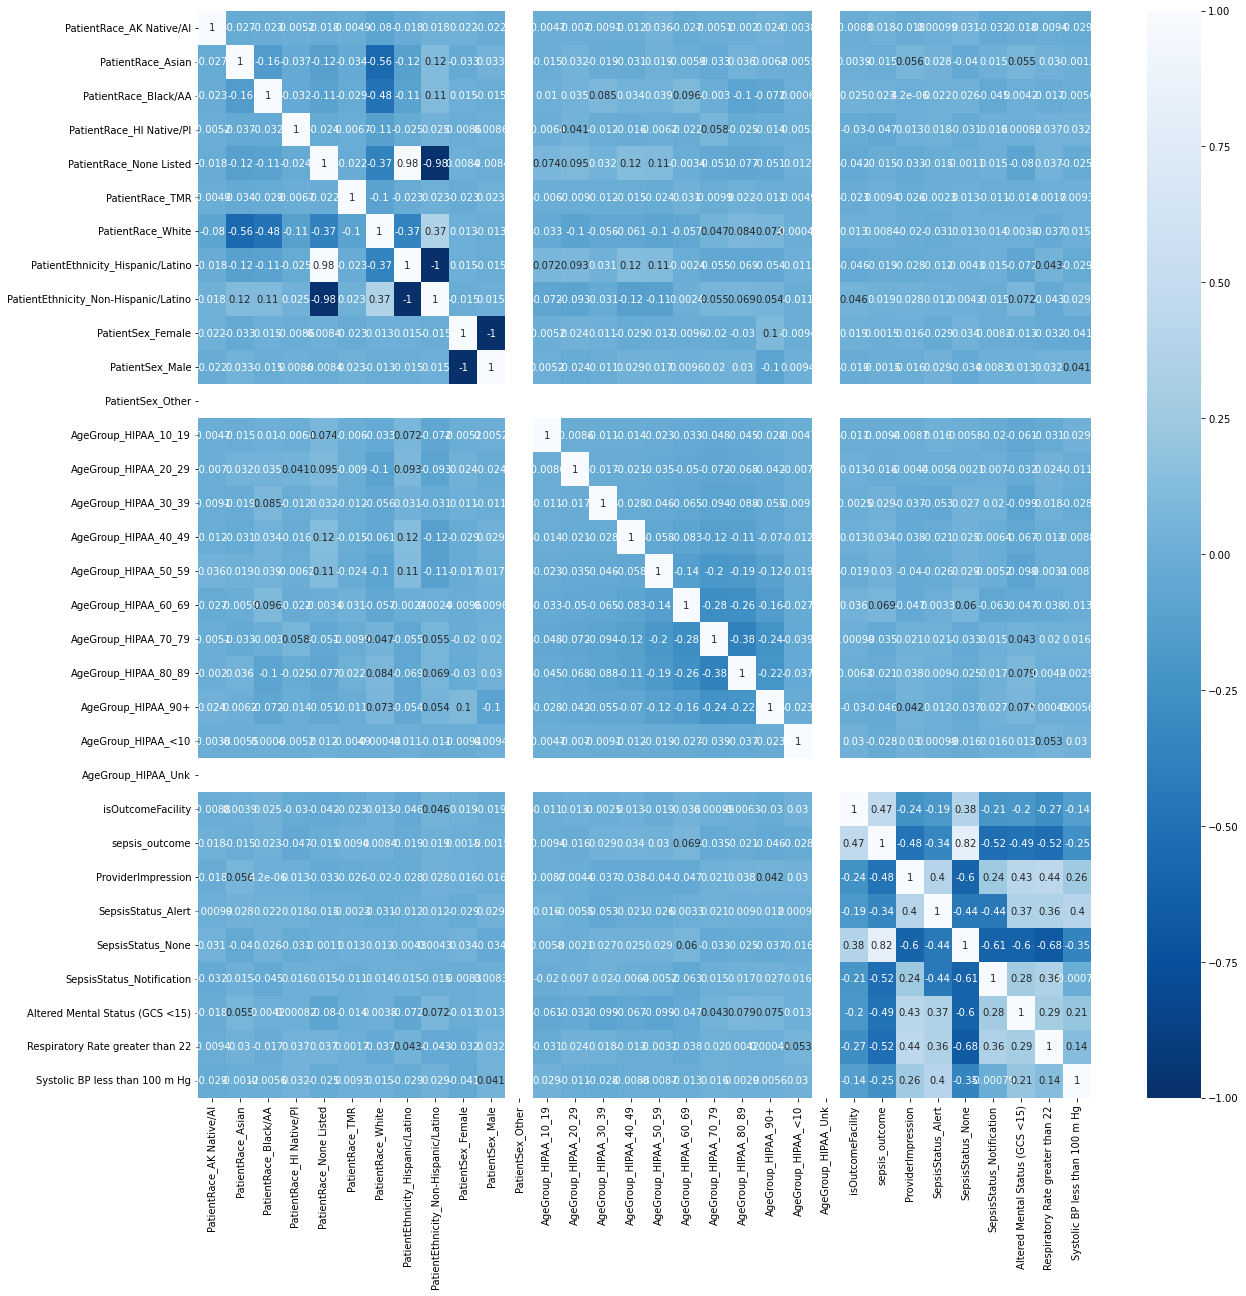

In [51]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#Checking the correlations among attributes.

plt.figure(figsize=(20,20))
sns.heatmap(PdmSEPSIS.corr(),cbar=True,annot=True,cmap='Blues_r')

In [49]:
PdmSEPSIS.corr()

,PatientRace_AK Native/AI,PatientRace_Asian,PatientRace_Black/AA,PatientRace_HI Native/PI,PatientRace_None Listed,PatientRace_TMR,PatientRace_White,PatientEthnicity_Hispanic/Latino,PatientEthnicity_Non-Hispanic/Latino,PatientSex_Female,...,AgeGroup_HIPAA_Unk,isOutcomeFacility,sepsis_outcome,ProviderImpression,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg
PatientRace_AK Native/AI,1.000000,-0.026658,-0.022975,-0.005220,-0.017612,-0.004857,-0.080231,-0.017909,0.017909,0.021610,...,NaN,-0.008847,0.018071,-0.017601,0.000988,0.031261,-0.032159,-0.018330,-0.009387,-0.029376
PatientRace_Asian,-0.026658,1.000000,-0.160928,-0.036564,-0.123360,-0.034023,-0.561975,-0.115722,0.115722,-0.033054,...,NaN,0.003945,-0.015423,0.055579,0.028161,-0.039909,0.015021,0.055303,0.029727,-0.001224
PatientRace_Black/AA,-0.022975,-0.160928,1.000000,-0.031512,-0.106316,-0.029323,-0.484331,-0.108113,0.108113,0.015049,...,NaN,0.024564,0.023152,0.000004,0.022012,0.025564,-0.045059,0.004203,-0.016987,-0.005609
PatientRace_HI Native/PI,-0.005220,-0.036564,-0.031512,1.000000,-0.024156,-0.006662,-0.110044,-0.024564,0.024564,-0.008624,...,NaN,-0.029989,-0.047203,0.013462,0.017793,-0.031244,0.015523,0.000820,0.036726,0.032372
PatientRace_None Listed,-0.017612,-0.123360,-0.106316,-0.024156,1.000000,-0.022477,-0.371265,0.983376,-0.983376,0.008433,...,NaN,-0.042075,-0.014768,-0.032653,-0.015308,-0.001052,0.014597,-0.080228,0.037301,-0.024925
PatientRace_TMR,-0.004857,-0.034023,-0.029323,-0.006662,-0.022477,1.000000,-0.102397,-0.022857,0.022857,-0.022632,...,NaN,-0.022793,0.009424,-0.025569,-0.002268,0.013371,-0.011374,-0.014102,0.001713,0.009318
PatientRace_White,-0.080231,-0.561975,-0.484331,-0.110044,-0.371265,-0.102397,1.000000,-0.366552,0.366552,0.012531,...,NaN,0.013415,0.008402,-0.020008,-0.030609,0.012637,0.014437,0.003780,-0.036748,0.014933
PatientEthnicity_Hispanic/Latino,-0.017909,-0.115722,-0.108113,-0.024564,0.983376,-0.022857,-0.366552,1.000000,-1.000000,0.014527,...,NaN,-0.046112,-0.019498,-0.028364,-0.011855,-0.004306,0.014798,-0.071770,0.042988,-0.028788
PatientEthnicity_Non-Hispanic/Latino,0.017909,0.115722,0.108113,0.024564,-0.983376,0.022857,0.366552,-1.000000,1.000000,-0.014527,...,NaN,0.046112,0.019498,0.028364,0.011855,0.004306,-0.014798,0.071770,-0.042988,0.028788
PatientSex_Female,0.021610,-0.033054,0.015049,-0.008624,0.008433,-0.022632,0.012531,0.014527,-0.014527,1.000000,...,NaN,0.019029,0.001491,0.015564,-0.029342,0.034222,-0.008284,-0.013429,-0.031828,-0.041169


Text(0, 0.5, 'sepsis_outcome')

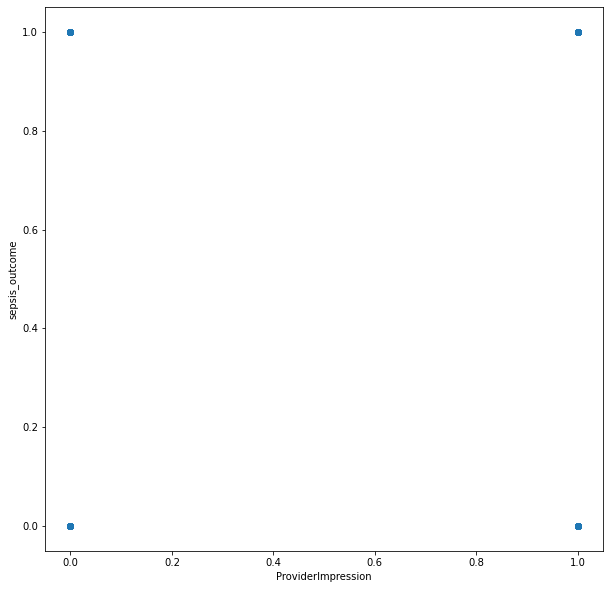

In [43]:
#How does Providor Impression affects the Outcome
plt.figure(figsize=(10,10))
plt.scatter(x='ProviderImpression',y='sepsis_outcome',data=PdmSEPSIS)
plt.xlabel('ProviderImpression')
plt.ylabel('sepsis_outcome')

Text(0, 0.5, 'Triage')

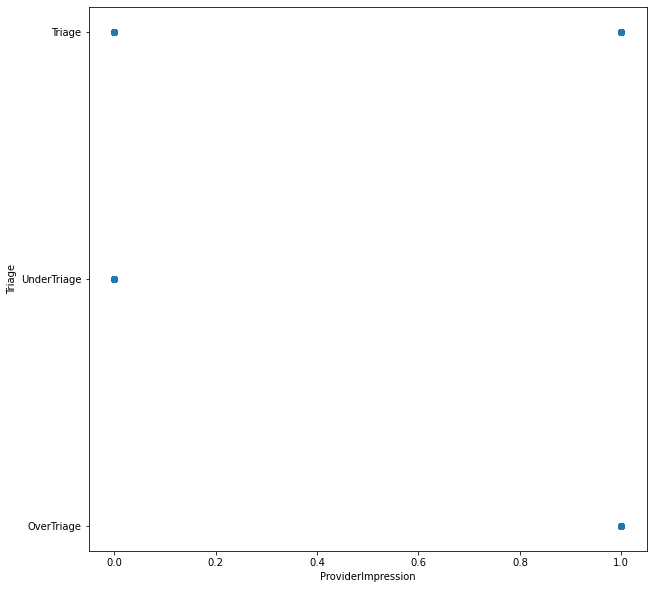

In [49]:
#How does Providor Impression affects the Triage
plt.figure(figsize=(10,10))
plt.scatter(x='ProviderImpression',y='Triage',data=PdmSEPSIS)
plt.xlabel('ProviderImpression')
plt.ylabel('Triage')

Text(0, 0.5, 'Accuracy')

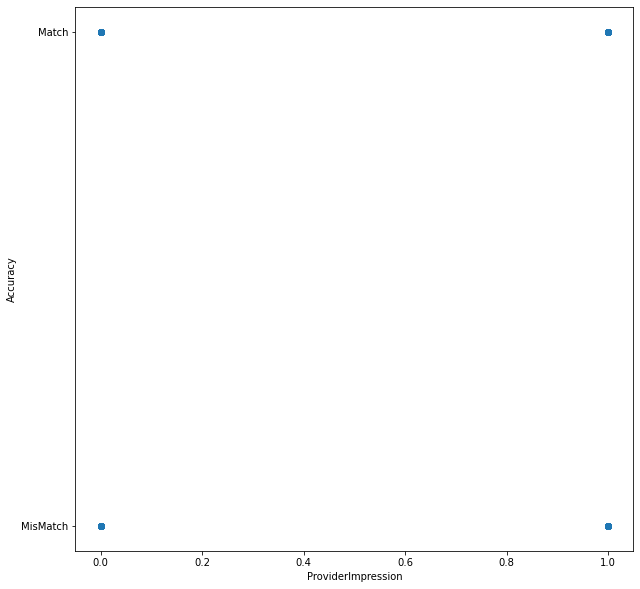

In [45]:
#How does Providor Impression affects the Accuracy
plt.figure(figsize=(10,10))
plt.scatter(x='ProviderImpression',y='Accuracy',data=PdmSEPSIS)
plt.xlabel('ProviderImpression')
plt.ylabel('Accuracy')

In [46]:
#Count Nulls
print(PdmSEPSIS.isnull().sum())

PtIDInternal            0
PatientRace             0
PatientEthnicity        0
PatientSex              0
IsJuvenileUnder18       0
IsSenior65+             0
AgeGroup_HIPAA          0
MonthYear               0
isOutcomeFacility       0
SepsisStatus            0
qSOFA                 774
Merged_Impression       0
sepsis_outcome          0
ProviderImpression      0
Accuracy                0
Triage                  0
dtype: int64


<AxesSubplot:>

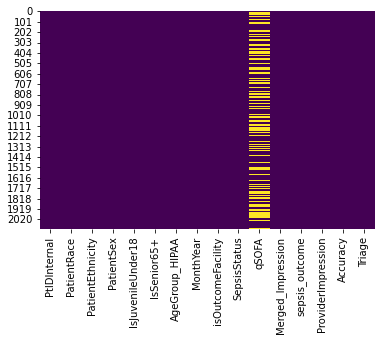

In [42]:
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PdmSEPSIS.isnull(),cbar=False,cmap='viridis')

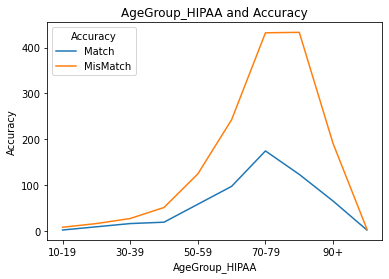

In [43]:
PdmSEPSIS.groupby(['AgeGroup_HIPAA','Accuracy'])['Accuracy'].count().unstack().plot(legend=True)
plt.title('AgeGroup_HIPAA and Accuracy')
plt.xlabel('AgeGroup_HIPAA')
plt.ylabel('Accuracy')
plt.show()

In [44]:
#Multi-panel Scatter Plot with Linked Brushing
source = PdmSEPSIS

selection = alt.selection_multi(fields=['Accuracy'], bind='legend')


Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   

    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
 
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
).add_selection(
    selection
).add_selection(brush)
Accuracy.display()

alt.Chart(...)

In [45]:
#Chart for reference

source = PdmSEPSIS
#.mark_line()/.mark_bar()/.mark_point()
#scales = alt.selection_interval(bind='scales')  
# interval = alt.selection_interval()
# make_example(interval)
Accuracy = alt.Chart(source, title ='Accuracy of Primary Impressions among Age Groups and Gender', width=400, height=300).mark_circle().encode(
    
    x = 'AgeGroup_HIPAA:N',
    y = alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population'),   
#   alt.X('AgeGroup_HIPAA:N', axis=alt.Axis(domain=False, tickSize=0)),
#   alt.Y('count(AgeGroup_HIPAA):Q',title='Total Population',stack='center', axis=None),
    color=alt.condition(brush, 'Accuracy:N', alt.value('lightgray')),      
 
    tooltip=['PatientSex','Accuracy', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)'],
    #opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    facet='PatientSex',
      
    size = alt.Size('count(AgeGroup_HIPAA)',title = 'Total Populaion',scale=alt.Scale(range=[100, 500]))
    ).add_selection(
    selection
    ).add_selection(brush).interactive()
Accuracy.display()

alt.Chart(...)

In [46]:
import altair as alt
from vega_datasets import data

source = PdmSEPSIS
selection = alt.selection_multi(fields=['Accuracy'], bind='legend')
PatSEPSISChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='Triage:N',
    column='SepsisStatus:N',
    tooltip=['Triage', 'sepsis_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).add_selection(
    selection
    ).interactive()
PatSEPSISChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# Repeat the same process for STEMI

In [47]:
#View Header and count null

print("\n header:\n",STEMI.head(2))

print("\n count null before merge:\n", STEMI.isnull().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                      No                          NaN               NaN  
1                     Yes                          NaN               NaN  

 count null before merge:
 MonthYear                                     0
PtIDInternal                                  

In [48]:
#Check if any columns or values are duplicated.
#STEMI['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STEMI.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STEMI['EmergencyDepartmentDiagnosis'].equals(STEMI['HospitalDiagnosis']))

print("\n Primary and Secondary Impression Duplicated?: ",STEMI['PrimaryImpression'].equals(STEMI['SecondaryImpression']))

# print("\n Race Duplicated?           : ",STEMI['Patient_Race_List_Raw'].equals(STEMI['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STEMI['Patient_Gender_Raw'].equals(STEMI['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [49]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STEMIclean = STEMI

#STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].astype(str) + STEMIclean["HospitalDiagnosis"].astype(str)
STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].fillna('') + STEMIclean["HospitalDiagnosis"].fillna('')

##drop reduntant columns
#STEMI.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STEMIclean.head(2))

print("\n count null after merge:\n", STEMIclean.isna().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                      No                          NaN               NaN   
1                     Yes                          NaN               NaN   

  overall_diagnosis  
0                    
1                    

 count null after merge:
 MonthYear                

In [50]:
#STEMIclean.dtypes
#print("\n count NaN after merge:\n",STEMIclean[STEMIclean == 'nannan'].count()) #975
print("\n count NaN after merge:\n",STEMIclean[STEMIclean == ''].count()) #975
#STEMIclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                                    0
PtIDInternal                                 0
PrimaryImpression                            0
SecondaryImpression                          0
isOutcomeFacility                            0
STEMIstatus                                  0
DoesClinicalPicSuggestAcuteMI                0
DoesProviderInterpretstSegmentElevation      0
DoesMonitorStateAcuteMI                      0
EmergencyDepartmentDiagnosis                 0
HospitalDiagnosis                            0
overall_diagnosis                          975
dtype: int64


In [51]:
STEMIclean.head(10)

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Notification,Yes,Yes,No,NaN,NaN,
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Notification,Yes,Yes,Yes,NaN,NaN,
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,NaN,NaN,
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,NaN,NaN,
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Alert,Yes,Yes,Yes,NaN,NaN,
5,2021-12,1787020,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Alert,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,ST elevation (STEMI) myocardial infarction of ...,ST elevation (STEMI) myocardial infarction of ...
6,2021-11,1761716,Respiratory - Acute Distress/ Breathing Diffic...,CV - Chest Pain - Presumed Cardiac (I20.9),1,Notification,Yes,No,Yes,"Chronic obstructive pulmonary disease, unspeci...","Chronic obstructive pulmonary disease, unspeci...","Chronic obstructive pulmonary disease, unspeci..."
7,2021-03,1507586,Encounter for general examination without comp...,Not Applicable,1,None,NaN,NaN,NaN,Syncope and collapse (R55),Other current complications following acute my...,Syncope and collapse (R55)Other current compli...
8,2021-08,1644084,Syncope - Syncopal/Fainting Episode (or Near) ...,CV - Hypotension (I95.9),1,Notification,Uncertain,No,Yes,Dependence on renal dialysis (Z99.2),"Dependence on renal dialysis (Z99.2), ""Shock, ...",Dependence on renal dialysis (Z99.2)Dependence...
9,2021-07,1615995,"CV - STEMI of Inferior Wall, With or Without C...",Not Applicable,1,Alert,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,ST elevation (STEMI) myocardial infarction inv...,ST elevation (STEMI) myocardial infarction of ...


In [52]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not

STEMIclean["STEMI_outcome"] = pd.np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False), 1, 0)

#pd.np.where(STEMIclean["overall_diagnosis"].str.contains("(STEMI)", na=False, case=False), "1", 
                                #pd.np.where(STEMIclean["overall_diagnosis"].str.contains("STEMI", na=False), "1",
                                #)#)
print(STEMIclean.head())
#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

  MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notification    

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11104/2261054342.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STEMIclean["STEMI_outcome"] = pd.np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False), 1, 0)


In [53]:
## create a new column that is STEMI if the PrimaryImpression column contains the string "STEMI", Other if not
STEMIclean["PrimaryImpr"] = pd.np.where(STEMIclean["PrimaryImpression"].str.contains("CV - STEMI", na=False, case=False), "STEMI","Other")   
                            
                            #pd.np.where(STEMIclean["PrimaryImpression"].str.contains("I21.0" or "I21.1" or "I21.2", na=False, case=False), "STEMI", "Other")   
                            
print(STEMIclean.head())





#Write as .csv
STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11104/348275756.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STEMIclean["PrimaryImpr"] = pd.np.where(STEMIclean["PrimaryImpression"].str.contains("CV - STEMI", na=False, case=False), "STEMI","Other")


  MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notification    

In [54]:
print("\n PImpressions Values: \n", STEMIclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STEMIclean['PrimaryImpr'].unique())
#print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())


 PImpressions Values: 
 ['CV - STEMI of other sites, With or Without Chest Pain (I21.2)'
 'CV - STEMI of Anterior Wall, With or Without Chest Pain (I21.0)'
 'CV - Hypotension (I95.9)'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)'
 'Encounter for general examination without complaint, suspected or reported (Z00)'
 'Syncope - Syncopal/Fainting Episode (or Near) (R55)'
 'CV - STEMI of Inferior Wall, With or Without Chest Pain (I21.1)'
 'CV - Chest Pain - Angina (I20.0)'
 'CV - Myocardial Infarction (Non-STEMI), With or Without Chest Pain (I21.4)'
 'Infectious - Sepsis (A41.9)' 'CV - Cardiac Arrest (I46.9)'
 'GI/GU - Abdominal Pain/Problem (R10.84)'
 'CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)'
 'CV - Chest Pain - Presumed Cardiac (I20.9)'
 'CV - Congestive Heart Failure (CHF) (I50.9)'
 'Pain - Chest (presumed non-cardiac) (R07.89)'
 'Infectious - Disease Unspecified (B99.9)'
 'GI/GU - Constipation (K59.00)' 'Neuro - Unconscious (R40.20)'
 'Neuro - Altered Mental Status / L

In [55]:
##Drop redundant column 
STEMIclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STEMIclean.head()

,MonthYear,PtIDInternal,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,STEMI_outcome,PrimaryImpr
0,2019-09,1041062,"""Not Applicable""",1,Notification,Yes,Yes,No,0,STEMI
1,2021-02,1470394,Not Applicable,1,Notification,Yes,Yes,Yes,0,STEMI
2,2020-06,1282737,Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,0,STEMI
3,2020-01,1143708,"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,0,Other
4,2020-03,1214025,"""Not Applicable""",1,Alert,Yes,Yes,Yes,0,STEMI


In [56]:
# merging the files how='inner' by default.
PdmSTEMI = pd.merge(PatDemo,STEMI, on='PtIDInternal') 
print(PdmSTEMI.head())
#Write as .csv
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)

   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1471290     Black/AA  Non-Hispanic/Latino       Male   
1       1542146        White  Non-Hispanic/Latino     Female   
2        818635          TMR  Non-Hispanic/Latino       Male   
3       1615472  None Listed      Hispanic/Latino       Male   
4       1741585        White  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  \
0                  0            0          50-59   2021-02   
1                  0            1          60-69   2021-05   
2                  0            0          50-59   2019-01   
3                  0            0          50-59   2021-07   
4                  0            1          80-89   2021-11   

                                 SecondaryImpression  isOutcomeFacility  \
0         CV - Chest Pain - Presumed Cardiac (I20.9)                  0   
1                                     Not Applicable                  1   
2   "CV - STEMI o

In [57]:
print(PdmSTEMI.head())
print(PdmSTEMI.columns)

   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1471290     Black/AA  Non-Hispanic/Latino       Male   
1       1542146        White  Non-Hispanic/Latino     Female   
2        818635          TMR  Non-Hispanic/Latino       Male   
3       1615472  None Listed      Hispanic/Latino       Male   
4       1741585        White  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  \
0                  0            0          50-59   2021-02   
1                  0            1          60-69   2021-05   
2                  0            0          50-59   2019-01   
3                  0            0          50-59   2021-07   
4                  0            1          80-89   2021-11   

                                 SecondaryImpression  isOutcomeFacility  \
0         CV - Chest Pain - Presumed Cardiac (I20.9)                  0   
1                                     Not Applicable                  1   
2   "CV - STEMI o

In [58]:
import altair as alt
#from vega_datasets import data

source = PdmSTEMI

PatSTEMIChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='STEMIstatus:N',
    tooltip=['PrimaryImpr', 'STEMI_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTEMIChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# REPEAT Process for STROKE

In [49]:
#View Header and count null

print("\n header:\n",STROKE.head(2))

print("\n count null before merge:\n", STROKE.isnull().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0         Alert  Abnormal        Left              NaN   
1  Notification  Abnormal      Normal         Abnormal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                        NaN                          NaN               NaN  
1                   Negative                          NaN               NaN  

 count null before merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                           437
FacialDroop                      433
PronatorArmDrift                 780
LargeVesselOcclusionScreen 

In [50]:
#Check if any columns or values are duplicated.
#STROKE['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STROKE.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STROKE['EmergencyDepartmentDiagnosis'].equals(STROKE['HospitalDiagnosis']))
print("\n Primary and Secondary Impression Duplicated?: ",STROKE['PrimaryImpression'].equals(STROKE['SecondaryImpression']))
# print("\n Race Duplicated?           : ",STROKE['Patient_Race_List_Raw'].equals(STROKE['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STROKE['Patient_Gender_Raw'].equals(STROKE['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False


In [51]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STROKEclean = STROKE

STROKEclean["overall_diagnosis"] = STROKEclean["EmergencyDepartmentDiagnosis"].astype(str) + STROKEclean["HospitalDiagnosis"].astype(str)

##drop reduntant columns
#STROKE.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STROKEclean.head(2))

print("\n count null after merge:\n", STROKEclean.isna().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0         Alert  Abnormal        Left              NaN   
1  Notification  Abnormal      Normal         Abnormal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Negative                          NaN               NaN   

  overall_diagnosis  
0            nannan  
1            nannan  

 count null after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                           437
FacialDroop                     

In [52]:
#STROKEclean.dtypes
print("\n count NaN after merge:\n",STROKEclean[STROKEclean == 'nannan'].count())
#STROKEclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                             0
FacialDroop                        0
PronatorArmDrift                   0
LargeVesselOcclusionScreen         0
EmergencyDepartmentDiagnosis       0
HospitalDiagnosis                  0
overall_diagnosis               1003
dtype: int64


In [53]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
#https://www.icd10data.com/ICD10CM/Codes/I00-I99/I60-I69/I63-/I63.9#:~:text=Cerebral%20infarction%2C%20unspecified,-2016%202017%202018&text=Billable%2FSpecific%20Code-,I63.,effective%20on%20October%201%2C%202021.

STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1", 
                                #pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False), "1",
                                pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I63.9", na=False, case=False), "1", "0"))#)

print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

  MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   
2   2020-04       1227568  Neuro - Stroke/CVA (I63.9)                  1   
3   2020-04       1223445  Neuro - Stroke/CVA (I63.9)                  0   
4   2020-04       1228956  Neuro - Stroke/CVA (I63.9)                  0   

   StrokeStatus    Speech FacialDroop   PronatorArmDrift  \
0         Alert  Abnormal        Left                NaN   
1  Notification  Abnormal      Normal           Abnormal   
2         Alert  Abnormal      Normal  Right Drifts Down   
3         Alert  Abnormal       Right             Normal   
4         Alert  Abnormal       Right             Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Nega

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8200/1341145244.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STROKEclean["STROKE_outcome"] = pd.np.where(STROKEclean["overall_diagnosis"].str.contains("STROKE", na=False, case=False), "1",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8200/1341145244.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(STROKEclean["overall_diagnosis"].str.contains("I63.9", na=False, case=False), "1", "0"))#)


In [54]:
## create a new column that is Sepsis if the PrimaryImpression column contains the string "Sepsis", Other if not

STROKEclean["PrimaryImpr"] = pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE", 
                               
                             pd.np.where(STROKEclean["PrimaryImpression"].str.contains("I6", na=False, case=False), "STROKE", "Other"))
print(STROKEclean.head())
#Write as .csv
STROKEclean.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8200/3547848885.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  STROKEclean["PrimaryImpr"] = pd.np.where(STROKEclean["PrimaryImpression"].str.contains("STROKE", na=False, case=False), "STROKE",
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8200/3547848885.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(STROKEclean["PrimaryImpression"].str.contains("I6", na=False, case=False), "STROKE", "Other"))


  MonthYear  PtIDInternal           PrimaryImpression  isOutcomeFacility  \
0   2020-04       1219470  Neuro - Stroke/CVA (I63.9)                  1   
1   2020-04       1232176  Neuro - Stroke/CVA (I63.9)                  1   
2   2020-04       1227568  Neuro - Stroke/CVA (I63.9)                  1   
3   2020-04       1223445  Neuro - Stroke/CVA (I63.9)                  0   
4   2020-04       1228956  Neuro - Stroke/CVA (I63.9)                  0   

   StrokeStatus    Speech FacialDroop   PronatorArmDrift  \
0         Alert  Abnormal        Left                NaN   
1  Notification  Abnormal      Normal           Abnormal   
2         Alert  Abnormal      Normal  Right Drifts Down   
3         Alert  Abnormal       Right             Normal   
4         Alert  Abnormal       Right             Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                        NaN                          NaN               NaN   
1                   Nega

In [55]:
print("\n PImpressions Values: \n", STROKEclean['PrimaryImpression'].unique())
print("\n PImpr Values: \n", STROKEclean['PrimaryImpr'].unique())



 PImpressions Values: 
 ['Neuro - Stroke/CVA (I63.9)' 'Infectious - Sepsis (A41.9)'
 'Neuro - TIA (transient ischemic attack) (G45.9)'
 'Neuro - Headache (R51)'
 'Respiratory - Acute Distress/ Breathing Difficulty (J80)'
 'Neuro - Altered Mental Status / Level of Consciousness (R41.82)'
 'Intracranial - Stroke (CVA) Hemorrhagic (I62.9)'
 'Neuro - Neuro Problem Not Otherwise Listed (G99.8)'
 'Infectious - Influenza (Flu Like Symptoms) (J11)' 'Weakness (R53.1)'
 'CV - Hypotension (I95.9)'
 'Encounter for general examination without complaint, suspected or reported (Z00)'
 'Pain - Extremity (Non-traumatic) (M79.609)'
 'Behavioral - Mental Disorder Not Otherwise Listed (F99)'
 'Endocrine - Hypoglycemia - Diabetic (E13.64)'
 'Abuse of Drug - Alcohol (ETOH) - Intoxication (F10.92)'
 'Neuro - Unconscious (R40.20)' 'Fever (R50.9)' 'CV - Hypertension (I10)'
 'Behavioral - Anxiety (F41.9)' 'Neuro - Seizure (G40.909)'
 'Injury - Head without L.O.C. (S06.0X0A)'
 'CV - Cardiac Arrhythmia/Dysrhythm

In [56]:
##Drop redundant column 
STROKEclean.drop(['PrimaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis","overall_diagnosis"], axis =1,  inplace =True)
STROKEclean.head()

,MonthYear,PtIDInternal,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,STROKE_outcome,PrimaryImpr
0,2020-04,1219470,1,Alert,Abnormal,Left,NaN,NaN,0,STROKE
1,2020-04,1232176,1,Notification,Abnormal,Normal,Abnormal,Negative,0,STROKE
2,2020-04,1227568,1,Alert,Abnormal,Normal,Right Drifts Down,Negative,0,STROKE
3,2020-04,1223445,0,Alert,Abnormal,Right,Normal,NaN,0,STROKE
4,2020-04,1228956,0,Alert,Abnormal,Right,Normal,Negative,0,STROKE


In [57]:
# merging the files how='inner' by default.
PdmSTROKE = pd.merge(PatDemo,STROKE, on='PtIDInternal') 
print(PdmSTROKE.head())
#Write as .csv
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)


   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1514789        White  Non-Hispanic/Latino     Female   
1       1496604        White  Non-Hispanic/Latino     Female   
2       1619115        White  Non-Hispanic/Latino       Male   
3       1363113     Black/AA  Non-Hispanic/Latino       Male   
4       1623419  None Listed      Hispanic/Latino     Female   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA MonthYear  isOutcomeFacility  \
0                  0            0          50-59   2021-04                  1   
1                  0            1          80-89   2021-03                  1   
2                  0            1          70-79   2021-07                  1   
3                  0            0          60-69   2020-10                  0   
4                  0            1          80-89   2021-07                  1   

   StrokeStatus    Speech FacialDroop     PronatorArmDrift  \
0          None       NaN         NaN                  NaN   
1  N

In [58]:
import altair as alt
#from vega_datasets import data

source = PdmSTROKE

PatSTROKEChart = alt.Chart(source).mark_bar().encode(
    x='AgeGroup_HIPAA:O',
    y='count(AgeGroup_HIPAA):Q',
    color='PrimaryImpr:N',
    column='StrokeStatus:N',
    tooltip=['PrimaryImpr', 'STROKE_outcome', 'AgeGroup_HIPAA', 'count(AgeGroup_HIPAA)']
).interactive()
PatSTROKEChart .display()
#PatDemChart.save('PatDemChart.html')

alt.Chart(...)

# Finding out the common patients across all data sets.

In [59]:
# merging the files how='inner' by default.
#PdmMerged = pd.merge(PatDemo,SEPSIS,STEMI,STROKE, on='PtIDInternal') 
PdmMerged = PatDemo.merge(SEPSIS, on='PtIDInternal').merge(STEMI,on='PtIDInternal').merge(STROKE,on='PtIDInternal')
PdmMerged 

#Alternatively
#df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
# print(df4)
# #Write as .csv
# df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA,MonthYear_x,isOutcomeFacility_x,SepsisStatus,...,PrimaryImpr_y,MonthYear,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,STROKE_outcome,PrimaryImpr
0,1585129,Asian,Non-Hispanic/Latino,Male,0,1,80-89,2021-06,1,None,...,Other,2021-06,1,Alert,Normal,Left,NaN,NaN,0,STROKE
1,1389021,None Listed,Hispanic/Latino,Male,0,0,40-49,2020-11,1,None,...,Other,2020-11,1,None,NaN,NaN,NaN,NaN,1,Other
2,1600193,Black/AA,Non-Hispanic/Latino,Male,0,1,70-79,2021-07,1,Notification,...,Other,2021-07,1,None,NaN,NaN,NaN,NaN,0,Other
3,1269781,White,Non-Hispanic/Latino,Male,0,0,50-59,2020-06,1,Notification,...,Other,2020-06,1,Alert,Normal,Normal,Normal,Negative,0,Other


In [60]:
# import altair as alt
# from vega_datasets import data

# chart = alt.Chart(data.cars.url).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N'
# )

# chart.save('chart.html')

In [61]:
 #Anaconda Prompt-jupyter notebook list-for token